# RDkit usage with SMARTS format

In [17]:
#This is to initialise the libraries
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

### Draw the Structures from SMILES strings 

In [18]:
#SMILES Format
mol = Chem.MolFromSmiles('CCCCCC')
mol1 = Chem.MolFromSmiles('CCCCC(=O)')
ala = Chem.MolFromSmiles('CC(C(=O)O)N')
tyr = Chem.MolFromSmiles('C1=CC(=CC=C1CC(C(=O)O)N)O')
phy = Chem.MolFromSmiles('C1=CC=C(C=C1)CC(C(=O)O)N')
cep = Chem.MolFromSmiles('CC(=O)OCC1=C(N2C(C(C2=O)NC(=O)CC3=CC=CS3)SC1)C(=O)[O-].[Na+]')
avi = Chem.MolFromSmiles('C1CC(N2CC1N(C2=O)OS(=O)(=O)[O-])C(=O)N')

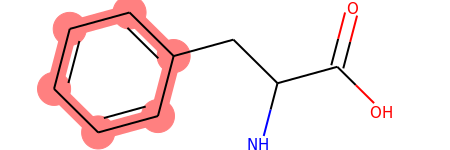

In [50]:
#Phenylalanine
phy

### To define SMARTS substructure strings

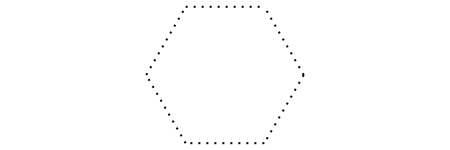

In [46]:
#To create the SMARTS substructure
m = Chem.MolFromSmarts('c1ccccc1')
m

#### To check SMARTS substructure present or not

In [53]:
#To Get wether have substructure or not
phy.HasSubstructMatch(m)

True

#### To check SMARTS substructure present in which region

In [56]:
#To get which particular region matches
phy.GetSubstructMatch(m)

(0, 1, 2, 3, 4, 5)

#### To check the length SMARTS substructure present 

In [55]:
#We can get the length of the matches
len(phy.GetSubstructMatch(m))

6

## To save the SMARTS substructure in Array

In [70]:
#Saving the few molecules in an array.
#img=Draw.MolsToGridImage(tyr MolsPerRow=2,subImgSize=(200,200))
ms = ['CCCCCC', 'CCCCC(=O)', 'CC(C(=O)O)N', 'C1=CC(=CC=C1CC(C(=O)O)N)O', 'C1=CC=C(C=C1)CC(C(=O)O)N' ]

#Chem.MolFromSmiles
msm = [Chem.MolFromSmiles('CCCCCC'), Chem.MolFromSmiles('CCCCC(=O)'), Chem.MolFromSmiles('CC(C(=O)O)N'), Chem.MolFromSmiles('C1=CC(=CC=C1CC(C(=O)O)N)O'), Chem.MolFromSmiles('C1=CC=C(C=C1)CC(C(=O)O)N') ]
#msm[1]

In [67]:
#Array assing
ms

['CCCCCC',
 'CCCCC(=O)',
 'CC(C(=O)O)N',
 'C1=CC(=CC=C1CC(C(=O)O)N)O',
 'C1=CC=C(C=C1)CC(C(=O)O)N']

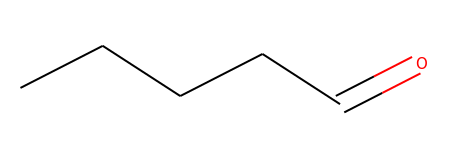

In [71]:
#MSM array containing structures
msm[1]

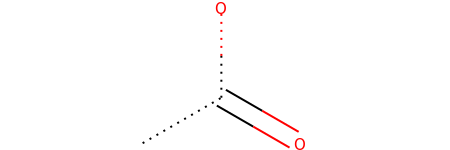

In [72]:
#For Substructure Searching for amino acid residues '[r]', CC(=O)O
#pattern=Chem.MolFromSmiles('c2ccccc2')
pattern=Chem.MolFromSmarts('CC(=O)O')
pattern

## In the Array containing structures searching for substructure

In [73]:
#For Substructure Searching for ring. If present True, else False.

for mol in msm:
    print(mol.HasSubstructMatch(pattern))


False
False
True
True
True


In [115]:
#MACCS Keys for substructure searching
from rdkit.Chem import MACCSkeys
fps = [Chem.RDKFingerprint(x) for x in msm]

fps_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fps, fps_arr)
np.nonzero(fps)
np.nonzero(fps_arr)

ArgumentError: Python argument types in
    rdkit.DataStructs.cDataStructs.ConvertToNumpyArray(list, numpy.ndarray)
did not match C++ signature:
    ConvertToNumpyArray(RDKit::SparseIntVect<unsigned long> bv, boost::python::api::object destArray)
    ConvertToNumpyArray(RDKit::SparseIntVect<unsigned int> bv, boost::python::api::object destArray)
    ConvertToNumpyArray(RDKit::SparseIntVect<long> bv, boost::python::api::object destArray)
    ConvertToNumpyArray(RDKit::SparseIntVect<int> bv, boost::python::api::object destArray)
    ConvertToNumpyArray(RDKit::DiscreteValueVect bv, boost::python::api::object destArray)
    ConvertToNumpyArray(ExplicitBitVect bv, boost::python::api::object destArray)

In [83]:
#Generating MACCS FingerPrints
fps = [Chem.RDKFingerprint(x) for x in msm]

fps[0]
#Getting the Similarity Indices
DataStructs.FingerprintSimilarity(fps[3],fps[4])

0.8154506437768241

In [137]:
#Morgan Fingerprint: To get the finger print Array
bi = {}
fp= AllChem.GetMorganFingerprintAsBitVect( msm[2], 2, nBits=1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[1, 33, 132, 147, 283, 389, 473, 650, 786, 807, 820, 893]

In [136]:
#To Print the Morgan Finger Prints
#from rdkit.Chem import Draw
prints = [(msm[2], x,  bi ) for x in fp.GetOnBits()]
#prints

#It will draw the Morgan FingerPrints (Substructure)
Draw.DrawMorganBits(prints, molsPerRow=4, legends=[str(x) for x in fp.GetOnBits()])
#Draw.DrawMorganBits(prints)

AttributeError: module 'rdkit.Chem.Draw' has no attribute 'DrawMorganBits'

In [138]:
prints

[(<rdkit.Chem.rdchem.Mol at 0x7f5bfdab15d0>,
  1,
  {1: ((1, 0),),
   33: ((0, 0),),
   132: ((1, 1),),
   147: ((5, 0),),
   283: ((0, 1),),
   389: ((4, 1),),
   473: ((2, 2),),
   650: ((3, 0),),
   786: ((5, 1),),
   807: ((2, 0), (4, 0)),
   820: ((2, 1),),
   893: ((3, 1),)}),
 (<rdkit.Chem.rdchem.Mol at 0x7f5bfdab15d0>,
  33,
  {1: ((1, 0),),
   33: ((0, 0),),
   132: ((1, 1),),
   147: ((5, 0),),
   283: ((0, 1),),
   389: ((4, 1),),
   473: ((2, 2),),
   650: ((3, 0),),
   786: ((5, 1),),
   807: ((2, 0), (4, 0)),
   820: ((2, 1),),
   893: ((3, 1),)}),
 (<rdkit.Chem.rdchem.Mol at 0x7f5bfdab15d0>,
  132,
  {1: ((1, 0),),
   33: ((0, 0),),
   132: ((1, 1),),
   147: ((5, 0),),
   283: ((0, 1),),
   389: ((4, 1),),
   473: ((2, 2),),
   650: ((3, 0),),
   786: ((5, 1),),
   807: ((2, 0), (4, 0)),
   820: ((2, 1),),
   893: ((3, 1),)}),
 (<rdkit.Chem.rdchem.Mol at 0x7f5bfdab15d0>,
  147,
  {1: ((1, 0),),
   33: ((0, 0),),
   132: ((1, 1),),
   147: ((5, 0),),
   283: ((0, 1),),
 

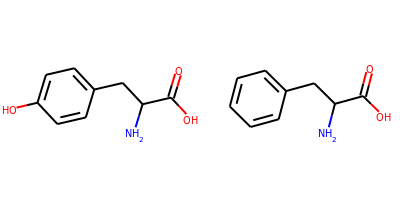

In [13]:
#Comparing Tyrosine and Phenylalanine
img= Draw.MolsToGridImage([msm[3], msm[4]], molsPerRow=2)
img


In [14]:
#Getting their Finger prints
fp3= AllChem.GetMorganFingerprintAsBitVect( msm[3], 2, nBits=1024, bitInfo=bi)
fp4= AllChem.GetMorganFingerprintAsBitVect( msm[4], 2, nBits=1024, bitInfo=bi)

print('Tyrosine', list(fp3.GetOnBits()))
print('PhenylAlanine', list(fp4.GetOnBits()))

#common= set(fp3.GetOnBits()) & set(fp4.GetOnBits())
#combined= set(fp3.GetOnBits()) | set(fp4.GetOnBits())
#print(common)
#print(combined)

#This gives us the values, how much molecules are similar, Tanimoto index.
#print(len(common)/len(combined))



Tyrosine [1, 79, 80, 147, 197, 289, 310, 356, 389, 403, 578, 650, 726, 730, 745, 754, 786, 807, 820, 825, 849, 857, 893, 1017]
PhenylAlanine [1, 42, 64, 79, 80, 147, 175, 197, 356, 389, 403, 650, 726, 730, 786, 807, 820, 825, 849, 857, 893, 1017]


In [139]:
#To get the Tanimoto Similarity
print(DataStructs.TanimotoSimilarity(fp3, fp4))

0.7037037037037037
